In [87]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [88]:
# read in data with read_csv() into a pandas dataframe
housing_df = pd.read_csv('housing.csv')

# use .info() to show features (ex. columns) in ur dataset along w/ a count & datatype
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Text(0.5, 0, 'House Values')

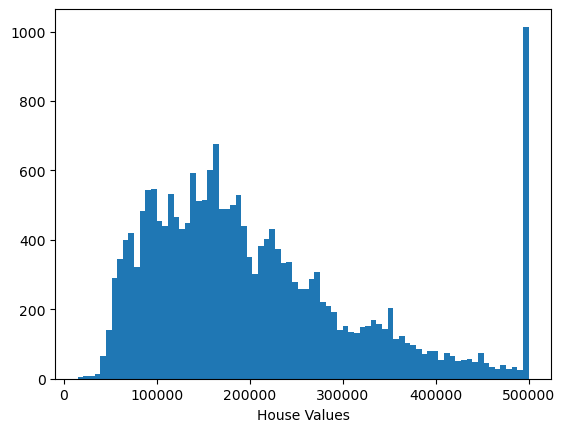

In [89]:
# plot distribution of target variable (median house value) using a histogram

# bins = amnt of columns
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")

# plot shows values are distributed normally w/ a few outliers
# most houses are around 100,000-200,000 range

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

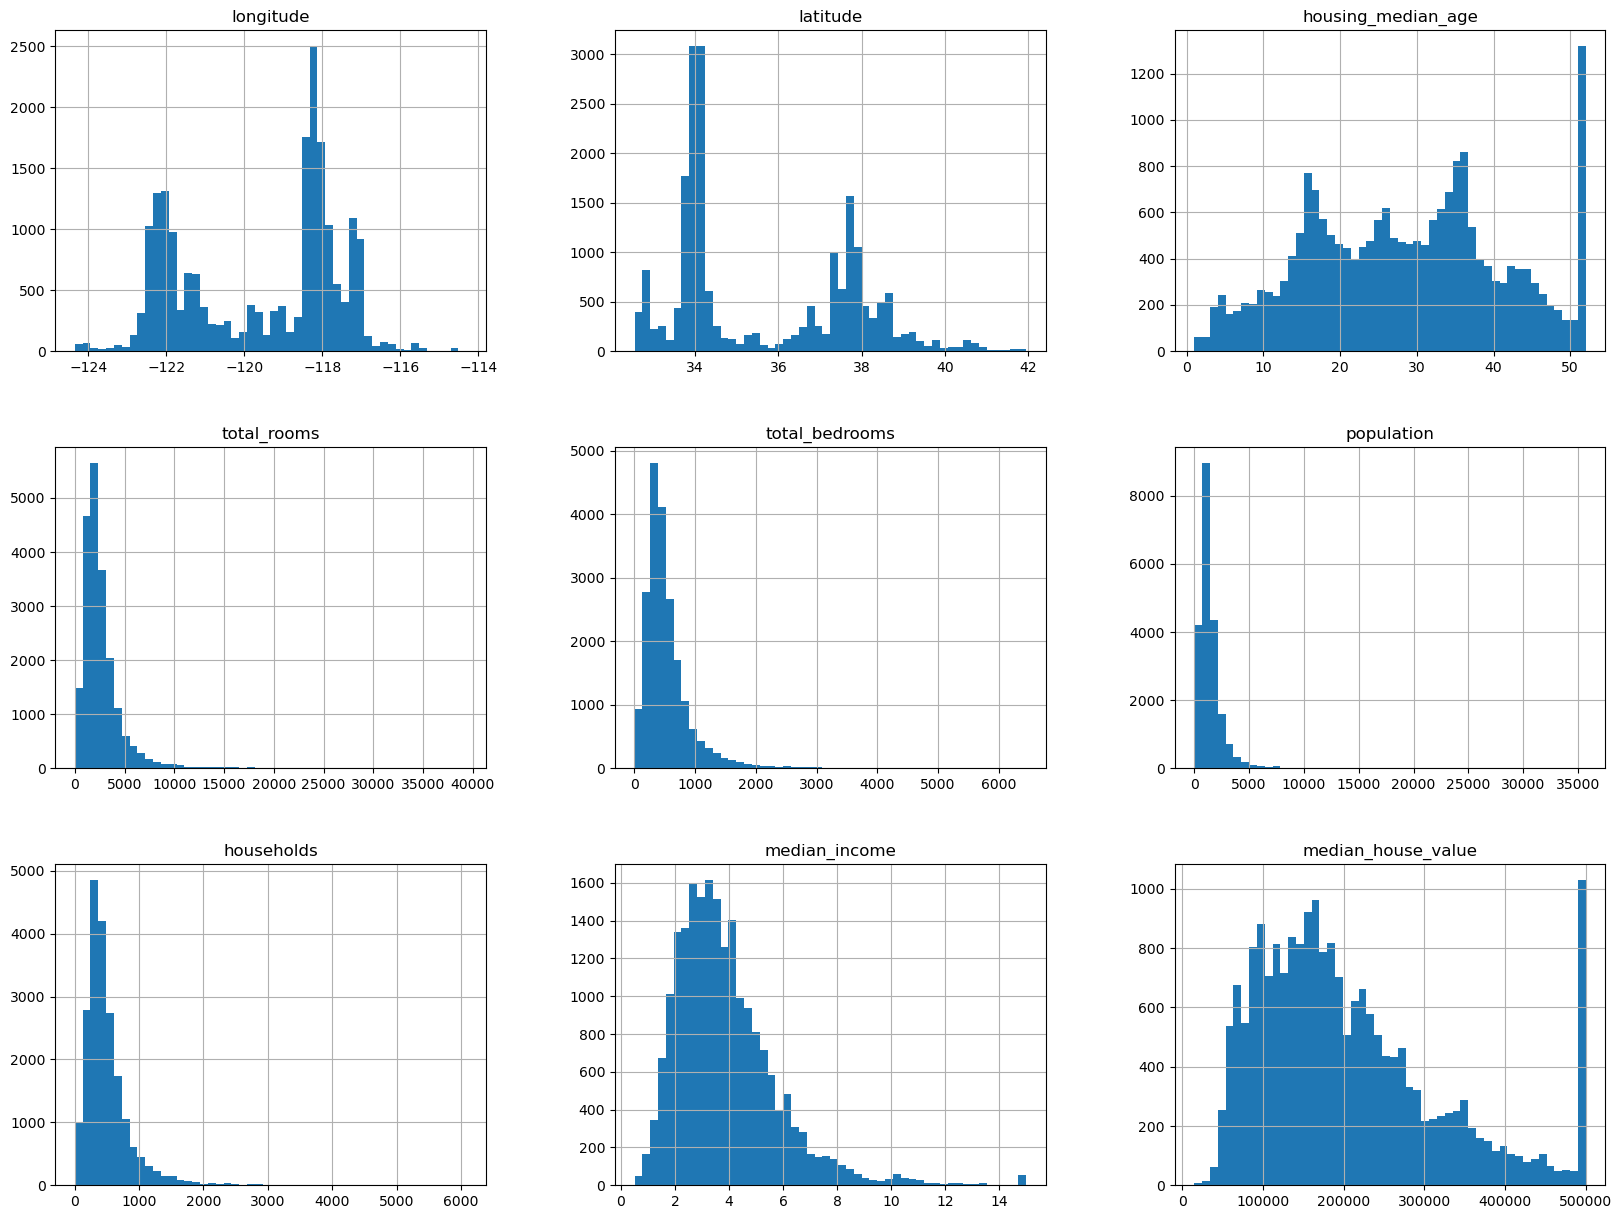

In [90]:
# plot histogram for all the features to understand data distributions
# using house_df as to not plot encoded values for OCEAN_PROXIMITY
housing_df.hist(bins=50, figsize=(20,15))

In [91]:
# plot a correlation matrix for each pair of columns in the dataframe

# getting all numerical values
df_numerical = housing_df.select_dtypes(include = ['number'])

corr = df_numerical.corr() # dataframe correlation function
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

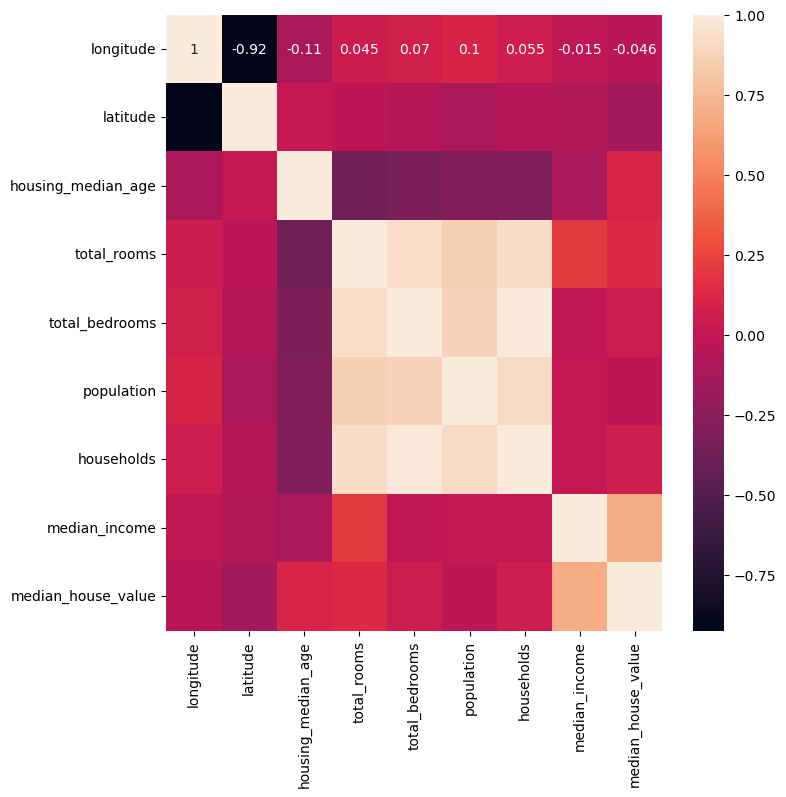

In [92]:
# make the heatmap larger in size
plt.figure(figsize = (8,8))

sns.heatmap(corr, annot=True)
plt.show()

In [93]:
# shows which features have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [94]:
# calculates the % of missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0] * 100

1.002906976744186

In [95]:
# new feature: ratio of total rooms to households
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']

# new feature: total bedrooms to total rooms
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']

# new feature: ratio of population to households
housing_df['population_per_household'] = housing_df['population']/housing_df['households']

# new feature: coordinates (from longitude + latitude)
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [96]:
# remove total_rooms, households, total_bedrooms, population, longitude, latitude
housing_df = housing_df.drop('total_rooms', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)

housing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20433 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


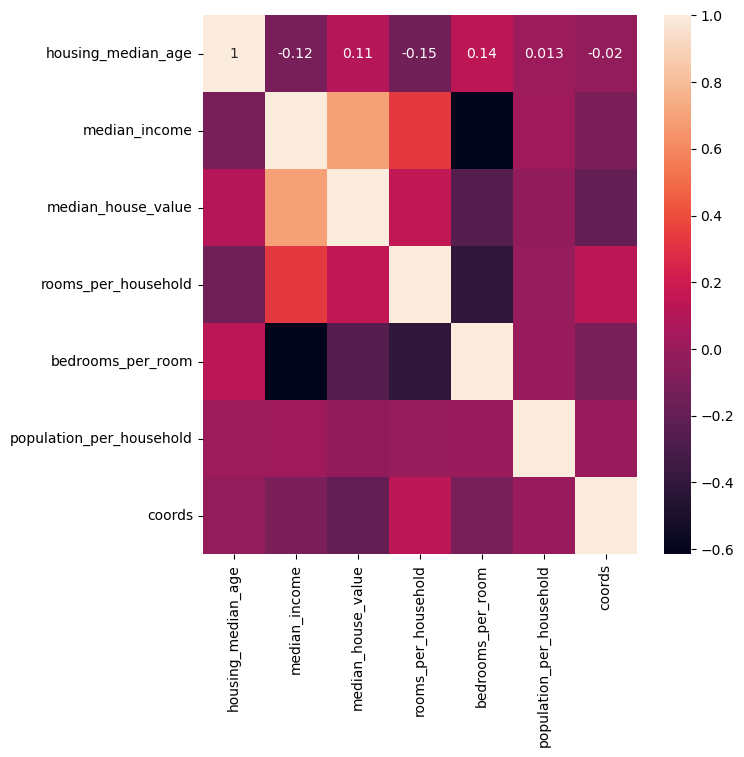

In [97]:
df_numerical = housing_df.select_dtypes(include = ['number'])

corr = df_numerical.corr()

# make heatmap larger in size
plt.figure(figsize=(7,7))

sns.heatmap(corr, annot=True)
plt.show()

In [98]:
# shows unique categories in OCEAN_PROXIMITY (our only categorical value)
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [99]:
# shows # of rows for each unique value
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [100]:
# one hot encoding 

# see how panda's get_dummies() works
print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [101]:
# replace ocean_proximity using get_dummies()
housing_df_encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity'])

# prints first couple observations
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False


In [102]:
# handling missing data

from sklearn.impute import KNNImputer

# create temporary copy of dataset
housing_df_temp = housing_df.copy()

# get columns w/ numerical data 
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

# extract columns that contain at least 1 missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

# update temp df w/ numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

In [110]:
# impute missing data using ML

# create knn imputer object
knn = KNNImputer(n_neighbors = 3)

# fit() trains the model
knn.fit(housing_df_temp)


# transform data using model

# apply transformation model (knn) to data
array_Values = knn.transform(housing_df_temp)

# covert arr values to dataframe w/ appropriate column names
housing_df_temp = pd.DataFrame(array_Values, columns = new_column_list)

# confirm there are no longer any missing values
housing_df_temp.isnull().sum()

bedrooms_per_room    0
dtype: int64

In [112]:
# overlay the imputed column over the old column with missing values

# loop through the list of columns and overlay each one
for column_name in new_column_list:
    housing_df[column_name] = housing_df_temp.replace(housing_df[column_name],housing_df[column_name])

# confirm columns no longer contain null data
housing_df.isnull().sum()

housing_median_age          0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
coords                      0
dtype: int64

In [104]:
# train the model

import sklearn
from sklearn.model_selection import train_test_split

# formatting column names (removing space, all lowercase, removing special chars)
housing_df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_df_encoded.columns]

# splitting target & feature variables
X = housing_df_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = housing_df_encoded['median_house_value']

print(X)

       housing_median_age  median_income  bedrooms_per_room  \
0                    41.0         8.3252           0.146591   
1                    21.0         8.3014           0.155797   
2                    52.0         7.2574           0.129516   
3                    52.0         5.6431           0.184458   
4                    52.0         3.8462           0.172096   
...                   ...            ...                ...   
20635                25.0         1.5603           0.224625   
20636                18.0         2.5568           0.215208   
20637                17.0         1.7000           0.215173   
20638                18.0         1.8672           0.219892   
20639                16.0         2.3886           0.221185   

       population_per_household    coords  ocean_proximity__1h_ocean  \
0                      2.555556 -3.226769                      False   
1                      2.109842 -3.228209                      False   
2                      2.80

In [105]:
# splitting training + testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

# confirm it was split properly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 10)
(6192, 10)
(14448,)
(6192,)


In [106]:
# model training: linear regression

from sklearn.linear_model import LinearRegression

# create linear regressor w/ all feature variables
reg_model = LinearRegression()

# train using training sets
reg_model.fit(X_train, y_train)

LinearRegression()

In [114]:
# run predictions
y_pred_test = reg_model.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [118]:
# model training: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# create regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=10)

# train w/ training sets
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [120]:
# run predictions
y_rf_pred_test = rf_model.predict(X_test)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values